In [1]:
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import json
import os
from vinum_analytica.utils import wilcoxon_test # type: ignore
from vinum_analytica.visualization.plots import Plotter # type: ignore

In [2]:
def save_best(model_data, model_name, filename):
    """Salva il modello migliore."""

    best_model_file = filename
    if os.path.exists(best_model_file):
        with open(best_model_file, 'r') as file:
            data = json.load(file)
    else:
        data = []

    # Append the new best model data
    data.append({
        "model_name": model_name,
        "hyperparams": model_data['hyperparams'],
        "accuracies": model_data['accuracies']
    })

    # Write the updated data back to the file
    with open(best_model_file, 'w') as file:
        json.dump(data, file, indent=4)

In [3]:
def model_analysis(json_file, model_name):
    try:
        # Load data from JSON file
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        # Calculate mean accuracy for each set
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        print(f"Mean accuracies: {mean_accuracies}")

        print(f"Model : Average Accuracy [Min, Max]")
        for i, d in enumerate(model_data):
            print(f"Model {i}: {mean_accuracies[i]:.4f} [{min(d['accuracies']):.4f}, {max(d['accuracies']):.4f}]")


        # Find the hyperparameters with the best mean accuracy
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Perform Wilcoxon test
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        print(f"Best model index: {best_index}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Wilcoxon test results: {wilcoxon_results}")

        # Write the data of the best model to a file with a new fild with the model name
        save_best(best_data, model_name, '../results/best.json')
        
        # Create and show violin plot
        plotter = Plotter()
        plotter.plot_violin_accuracy_comparison(model_data, '')

    except FileNotFoundError:
        print(f"File not found")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [4]:
# Open the file in write mode to reset its contents
with open('../results/best.json', 'w') as file:
    file.write('[]')

Mean accuracies: [0.4089407242299436, 0.4086029713802808, 0.37639690578261886, 0.3632678521000729, 0.4129940961891003, 0.3624308334725539, 0.45299817719681884, 0.4047992180748214]
Model : Average Accuracy [Min, Max]
Model 0: 0.4089 [0.4050, 0.4136]
Model 1: 0.4086 [0.4055, 0.4113]
Model 2: 0.3764 [0.3709, 0.3805]
Model 3: 0.3633 [0.3551, 0.3694]
Model 4: 0.4130 [0.4068, 0.4200]
Model 5: 0.3624 [0.3576, 0.3670]
Model 6: 0.4530 [0.4468, 0.4579]
Model 7: 0.4048 [0.3980, 0.4120]
Best model index: 6
Best model hyperparameters: {'criterion': 'gini', 'min_impurity_decrease': 1e-08, 'max_depth': 1000}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '1', 'p_value': 0.03125}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '5', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.03125}]


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


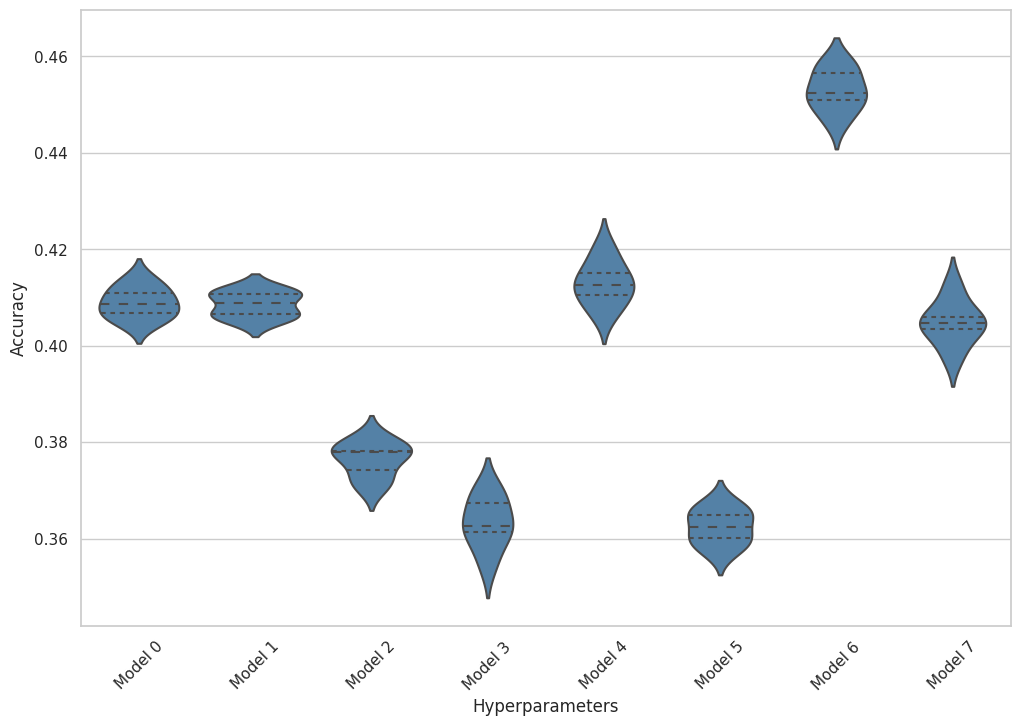

In [5]:
model_analysis('../results/dt_tuning.json', 'dt')

Mean accuracies: [0.603013552798973, 0.6043204970996415, 0.6045996564453879, 0.593644089559624, 0.5337846750421381, 0.6201959344408715, 0.5751986107160186, 0.6196526106238159]
Model : Average Accuracy [Min, Max]
Model 0: 0.6030 [0.5971, 0.6075]
Model 1: 0.6043 [0.5994, 0.6094]
Model 2: 0.6046 [0.6012, 0.6090]
Model 3: 0.5936 [0.5889, 0.6006]
Model 4: 0.5338 [0.5260, 0.5390]
Model 5: 0.6202 [0.6144, 0.6241]
Model 6: 0.5752 [0.5687, 0.5816]
Model 7: 0.6197 [0.6142, 0.6267]
Best model index: 5
Best model hyperparameters: {'n_estimators': 100, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': 1000}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '1', 'p_value': 0.03125}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '6', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.6858304344516057}]


/home/paolo/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paolo/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


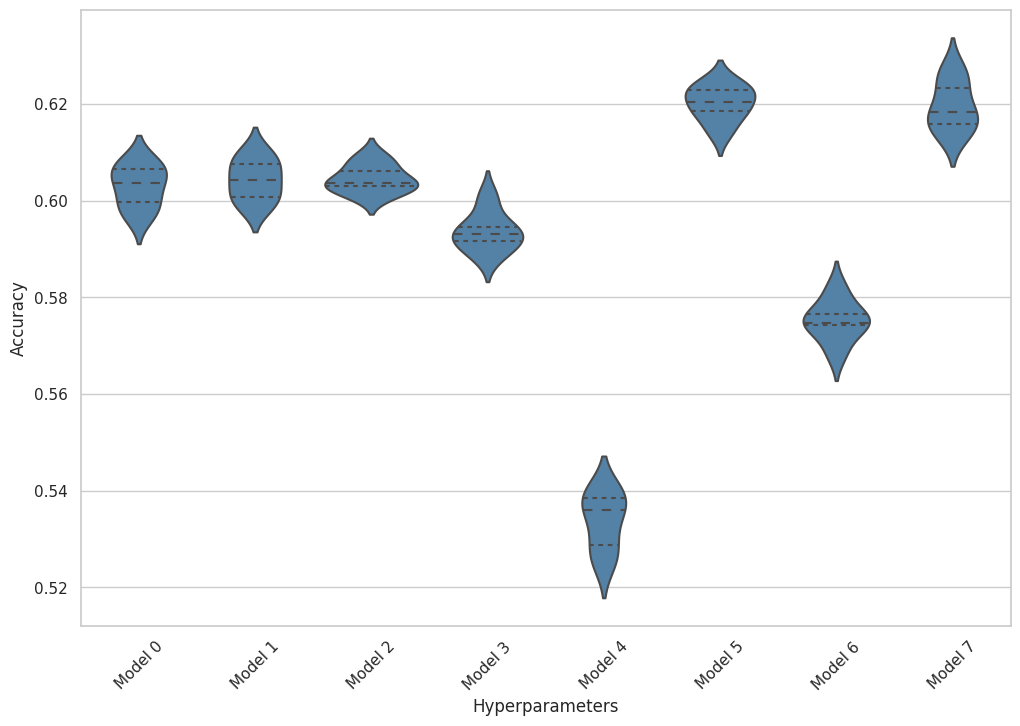

In [6]:
model_analysis('../results/rf_tuning.json', 'rf')

Mean accuracies: [0.6032631365116493, 0.6216499416164011, 0.6050695174129431, 0.5626570579480216, 0.5739503492129868, 0.6101949277771167, 0.5604688609814178, 0.6023087729946471]
Model : Average Accuracy [Min, Max]
Model 0: 0.6033 [0.5991, 0.6097]
Model 1: 0.6216 [0.6120, 0.6311]
Model 2: 0.6051 [0.6019, 0.6077]
Model 3: 0.5627 [0.5375, 0.5765]
Model 4: 0.5740 [0.5570, 0.5826]
Model 5: 0.6102 [0.6038, 0.6169]
Model 6: 0.5605 [0.5466, 0.5666]
Model 7: 0.6023 [0.5972, 0.6136]
Best model index: 1
Best model hyperparameters: {'hidden_size': 64, 'epochs': 5, 'lr': 0.001}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '5', 'p_value': 0.09375}, {'model': '6', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.03125}]


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


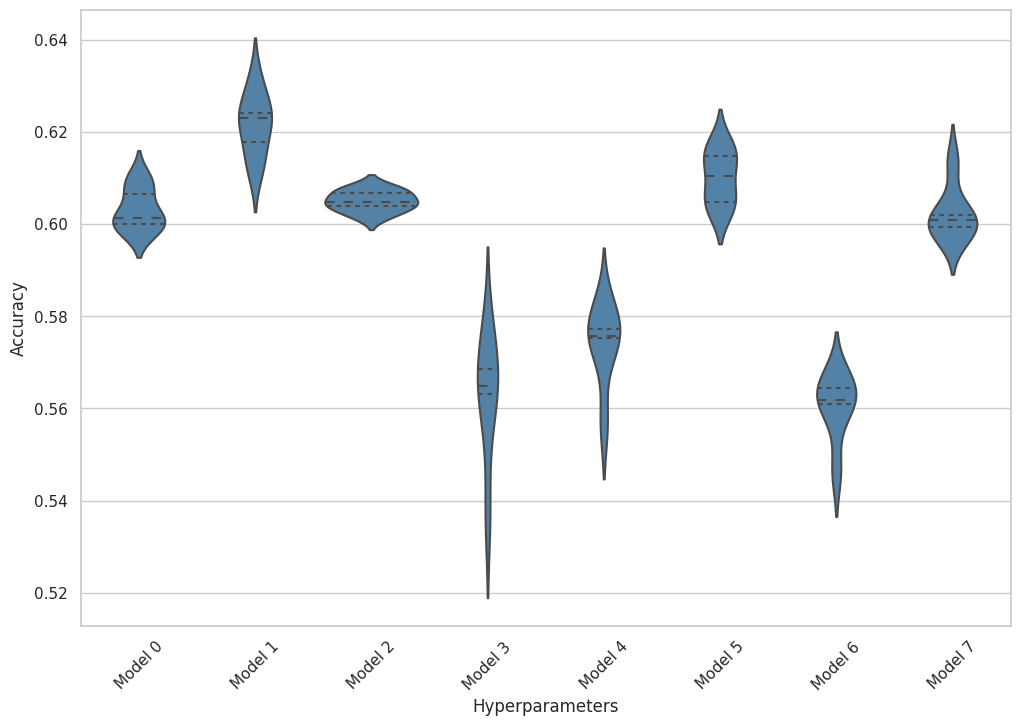

In [7]:
model_analysis('../results/nn_tuning.json', 'nn')

In [8]:
def best_analysis():
    """
    Funzione principale che carica i dati, esegue il test di Wilcoxon e plotta i risultati.

    Parameters:
        json_file (str): Percorso al file JSON contenente i dati dei modelli.
    """
    try:
        json_file = '../results/best.json'
        # Carica i dati dal file JSON
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        name_map = {
            'rf': 'Random Forest',
            'dt': 'Decision Tree',
            'nn': 'Neural Network'
        }

        # Calcola la media delle accuracies per ciascun modello
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        # Stampa le accuratezze medie
        print(f"Mean accuracies: {mean_accuracies}")

        print(f"Model : Average Accuracy [Min, Max]")
        res = []
        for i, d in enumerate(model_data):
            res.append({
                "model": name_map[d['model_name']],
                "mean_accuracy": mean_accuracies[i],
                "min_accuracy": min(d['accuracies']),
                "max_accuracy": max(d['accuracies'])
            })
            print(f"{name_map[d['model_name']]}: {mean_accuracies[i]:.4f} [{min(d['accuracies']):.4f}, {max(d['accuracies']):.4f}]")


        # Trova l'indice del modello con la migliore accuracy media
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Esegui il test di Wilcoxon tra il miglior modello e gli altri
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        # Stampa i risultati
        print(f"\nBest model name: {best_data['model_name']}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Best model mean accuracy: {mean_accuracies[best_index]}")
        print("\nWilcoxon test results:")
        for result in wilcoxon_results:
            print(f"Model: {result['model']}, p-value: {result['p_value']}")

        # Crea e mostra il violin plot per il confronto delle accuracy
        plotter = Plotter()
        x_labels = [name_map[d['model_name']] for d in model_data]

        plotter.plot_violin_accuracy_comparison(model_data, title='', x_label='Models', x_ticks_labels=x_labels, label_rotation=0)

        return res

    except FileNotFoundError:
        print(f"File not found: {json_file}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

Mean accuracies: [0.45299817719681884, 0.6201959344408715, 0.6216499416164011]
Model : Average Accuracy [Min, Max]
Decision Tree: 0.4530 [0.4468, 0.4579]
Random Forest: 0.6202 [0.6144, 0.6241]
Neural Network: 0.6216 [0.6120, 0.6311]

Best model name: nn
Best model hyperparameters: {'hidden_size': 64, 'epochs': 5, 'lr': 0.001}
Best model mean accuracy: 0.6216499416164011

Wilcoxon test results:
Model: dt, p-value: 0.03125
Model: rf, p-value: 0.84375


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


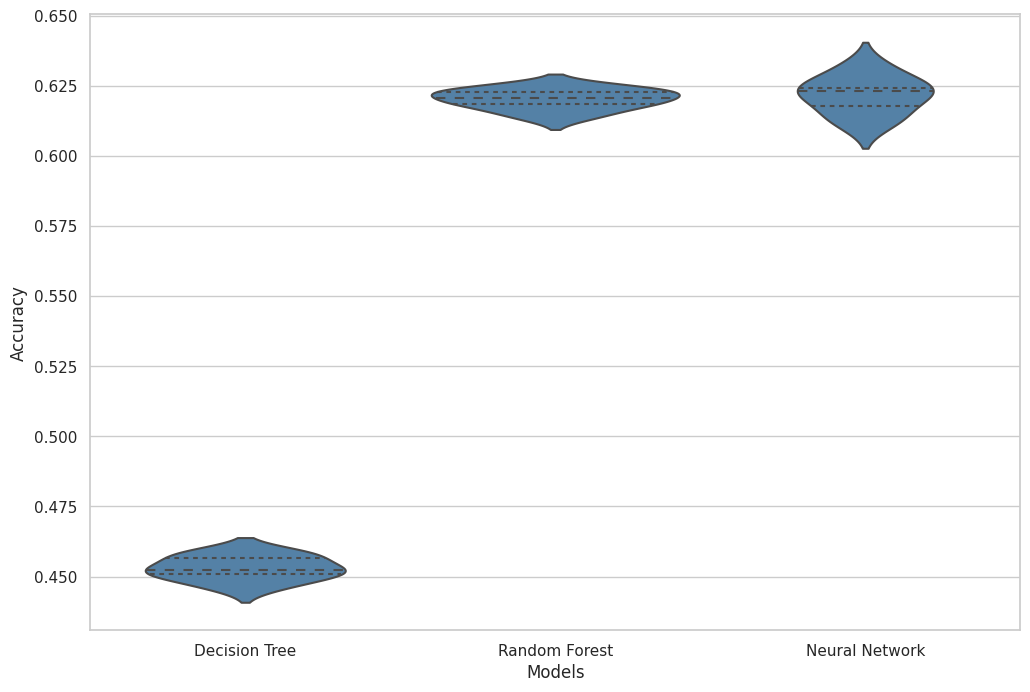

In [9]:
train_res = best_analysis()

In [10]:
from vinum_analytica.data import WineDatasetManager # type: ignore
from vinum_analytica.models import TreeModel, RandomForestModel, NeuralNetworkModel # type: ignore

dataset = WineDatasetManager()
dataset.load('../data/processed/test.csv')
testset = dataset


In [11]:
tree = TreeModel.load('../models/tree_model.pkl')
forest = RandomForestModel.load('../models/random_forest_model.pkl')
neural = NeuralNetworkModel.load('../models/nn_model.pkl')

test_res = [{
    "model": "Decision Tree",
    "accuracy": tree.evaluate(testset)
}, {
    "model": "Random Forest",
    "accuracy": forest.evaluate(testset)
}, {
    "model": "Neural Network",
    "accuracy": neural.evaluate(testset)
}]


/home/paolo/Projects/WineReviewMining/wine_reviews_mining/src/models/nn_model.py:157: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_locatio

In [12]:
print("Validation accuracies:")
for res in train_res:
    print(f"{res['model']}: {res['mean_accuracy']:.4f}")
print("Test accuracies:")
for res in test_res:
    print(f"{res['model']}: {res['accuracy']:.4f}")

Validation accuracies:
Decision Tree: 0.4530
Random Forest: 0.6202
Neural Network: 0.6216
Test accuracies:
Decision Tree: 0.4679
Random Forest: 0.6336
Neural Network: 0.6350


In [13]:
combined_results = []

for train, test in zip(train_res, test_res):
    combined_results.append({
        "model": train['model'],
        "validation_accuracy": train['mean_accuracy'],
        "test_accuracy": test['accuracy']
    })

print(combined_results)

[{'model': 'Decision Tree', 'validation_accuracy': 0.45299817719681884, 'test_accuracy': 0.4678688909774436}, {'model': 'Random Forest', 'validation_accuracy': 0.6201959344408715, 'test_accuracy': 0.6335761278195489}, {'model': 'Neural Network', 'validation_accuracy': 0.6216499416164011, 'test_accuracy': 0.6350446428571429}]


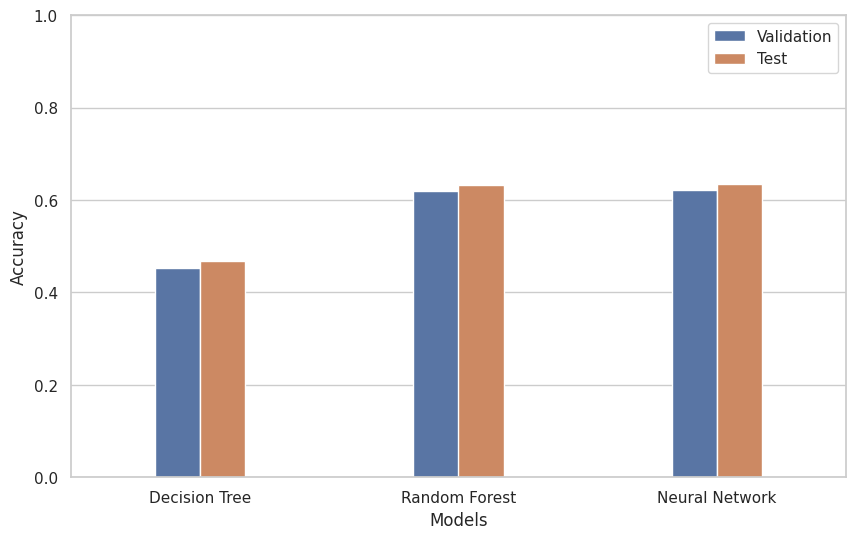

In [14]:
plotter = Plotter()
plotter.plot_validation_test_accuracy_comparison(combined_results, bar_width=0.35)

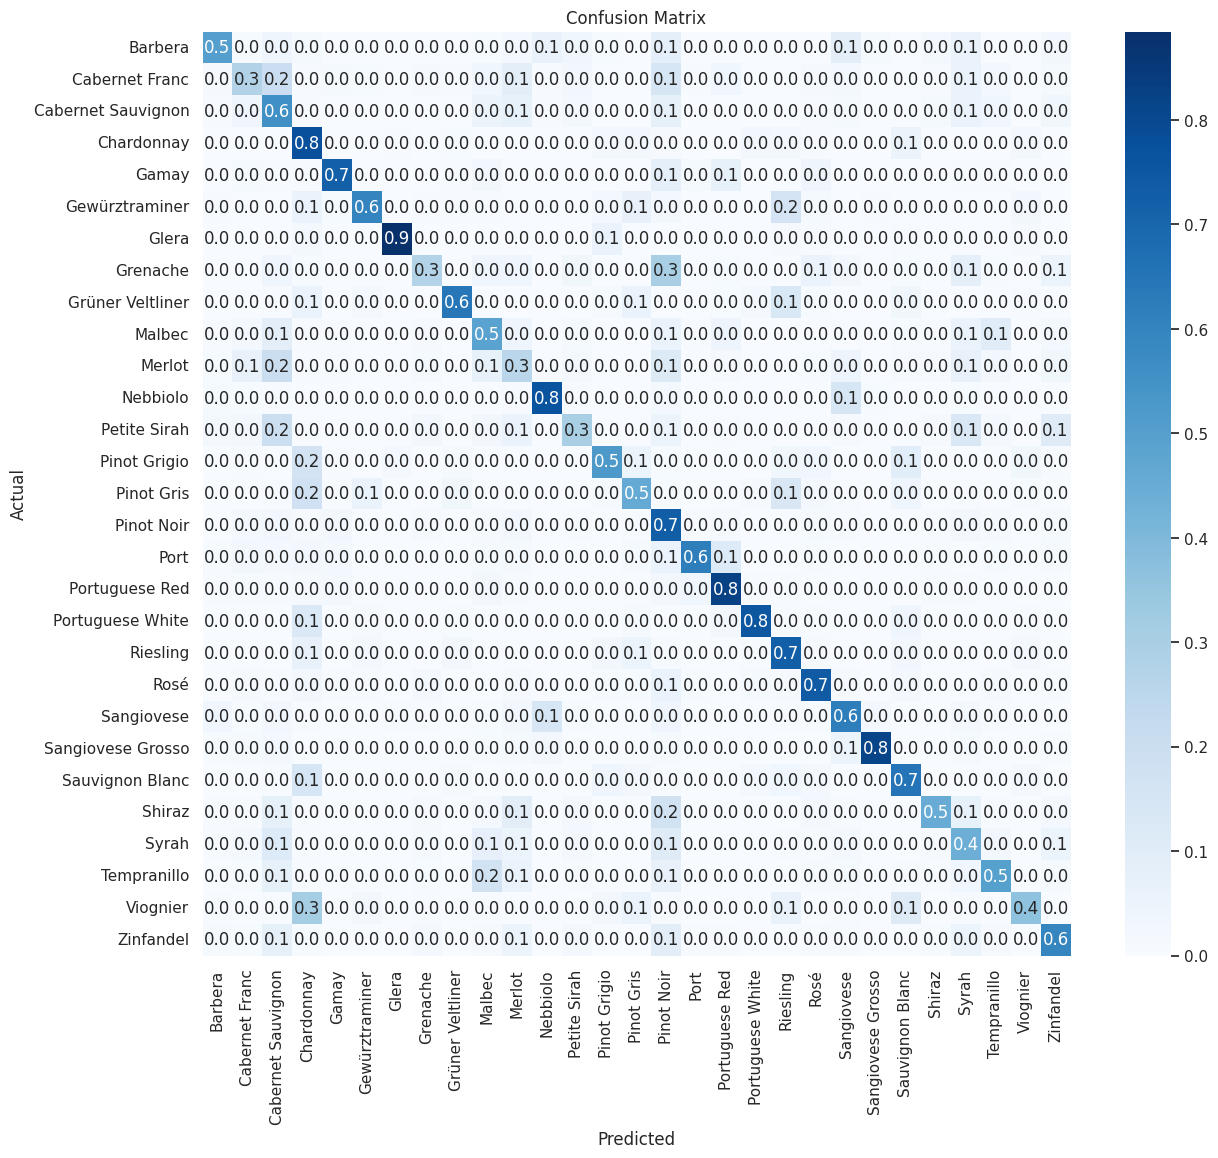

In [15]:
from sklearn.metrics import confusion_matrix

matrix = neural.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = neural.classes(), figsize=(14, 12))

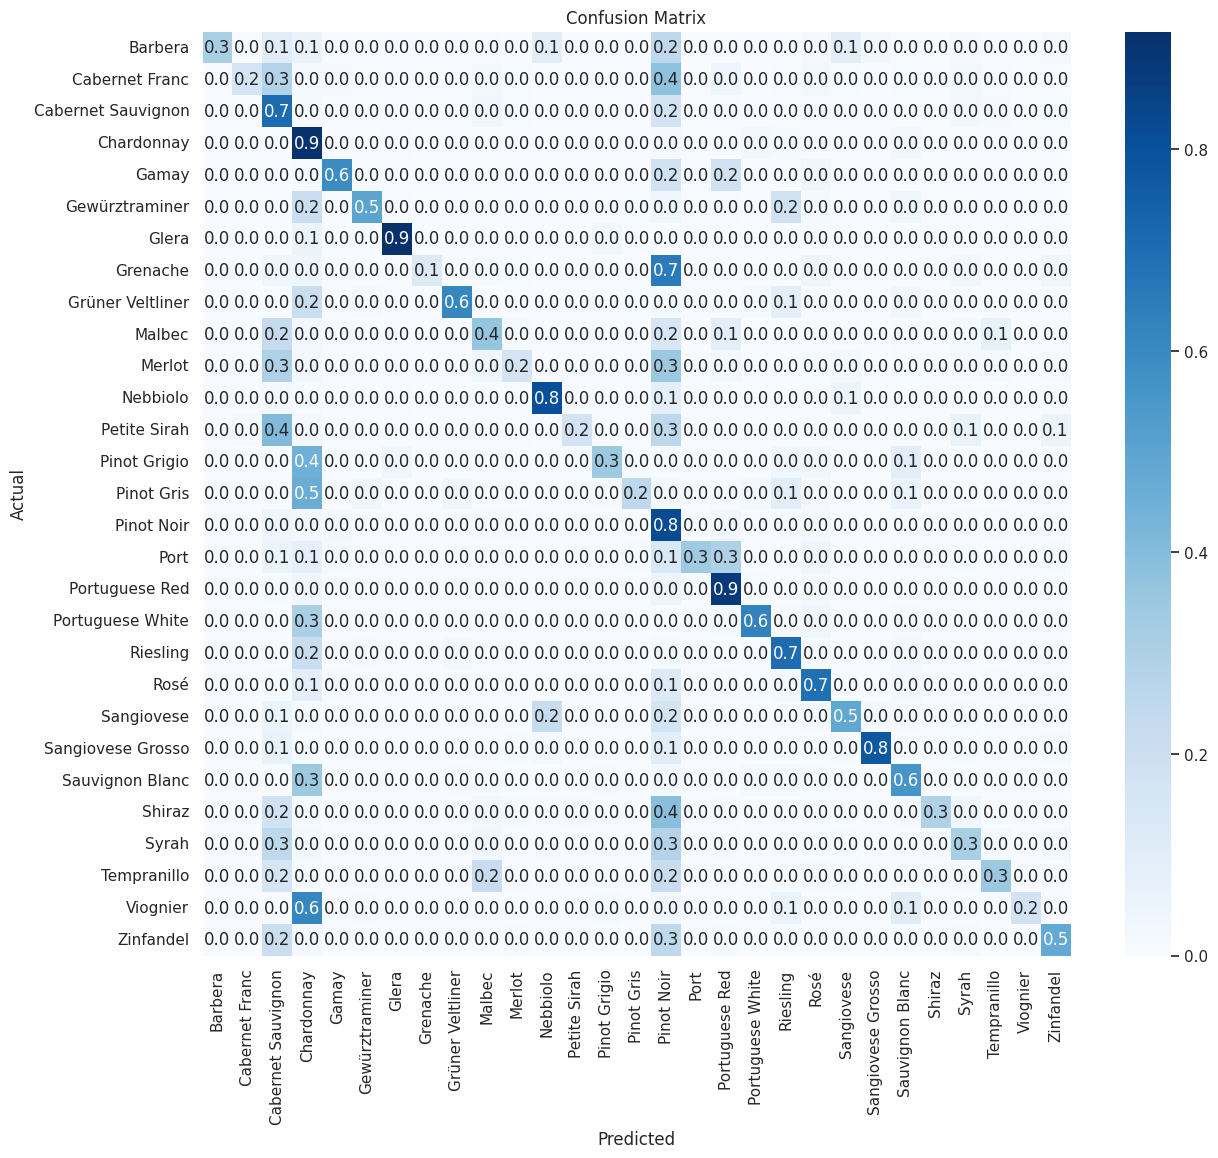

In [16]:
from sklearn.metrics import confusion_matrix

matrix = forest.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = forest.classes(), figsize=(14, 12))